# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


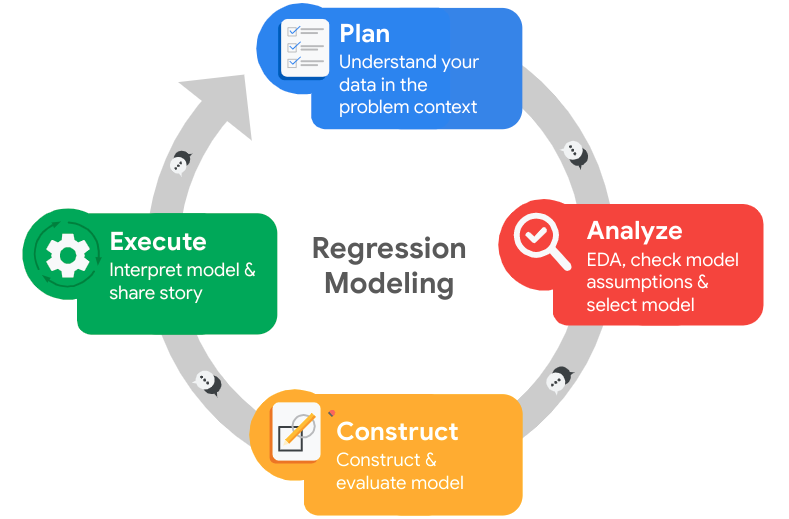

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1.Who are your stakeholders for this project? The stakeholders for this project are the people in HR department at Salifort Motors company.
2.What are you trying to solve or accomplish? To understand what’s likely to make the employee leave the company?
3.What are your initial observations when you explore the data? By analysing the different variables of employees who left the company I can get insights about improvement of employees satisfaction level.
4.What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
5.Do you have any ethical considerations in this stage?

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the colunms in the dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For metrics and helpful functions

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models 
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")
df = df0.copy()
# Display first few rows of the dataframe
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df = df.rename(columns= {'average_montly_hours':'average_monthly_hours', 
                         'time_spend_company':'tenure', 
                         'Work_accident':'work_accident',
                         'Department':'department' })

# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

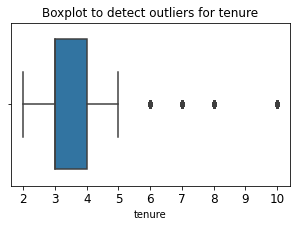

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(5,3))
sns.boxplot(x=df1['tenure'])
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
# Determine the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75+ 1.5*iqr
lower_limit = percentile25- 1.5*iqr
print("upper_limit:", upper_limit)
print("lower_limit:", lower_limit)

outliers = df1[(df1['tenure']>upper_limit)| (df1['tenure']<lower_limit)]

print("number of rows containing outliers in tenure column:", len(outliers))

upper_limit: 5.5
lower_limit: 1.5
number of rows containing outliers in tenure column: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

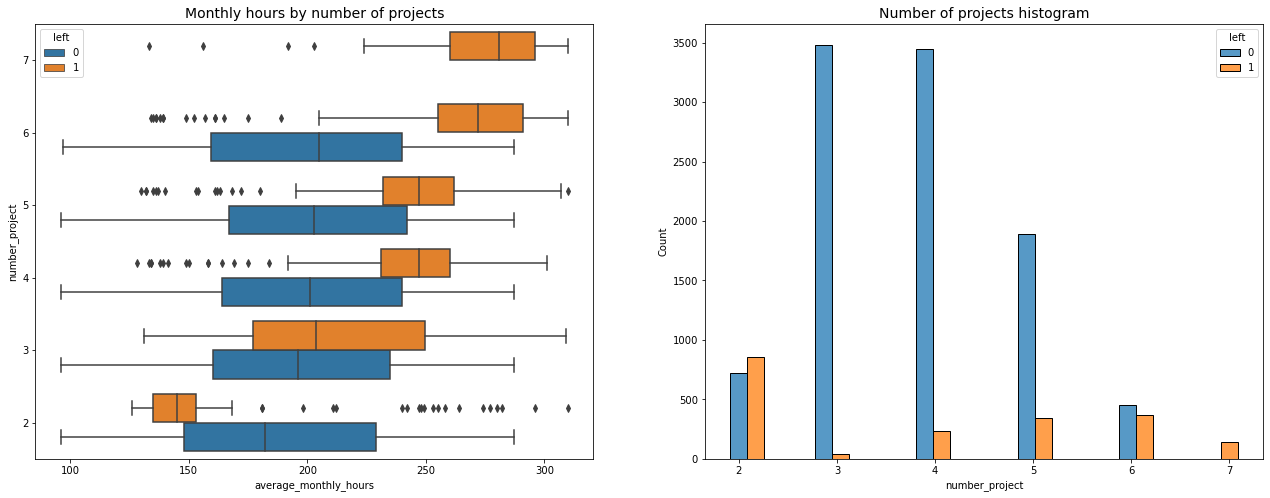

In [14]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [15]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by satisfaction level')

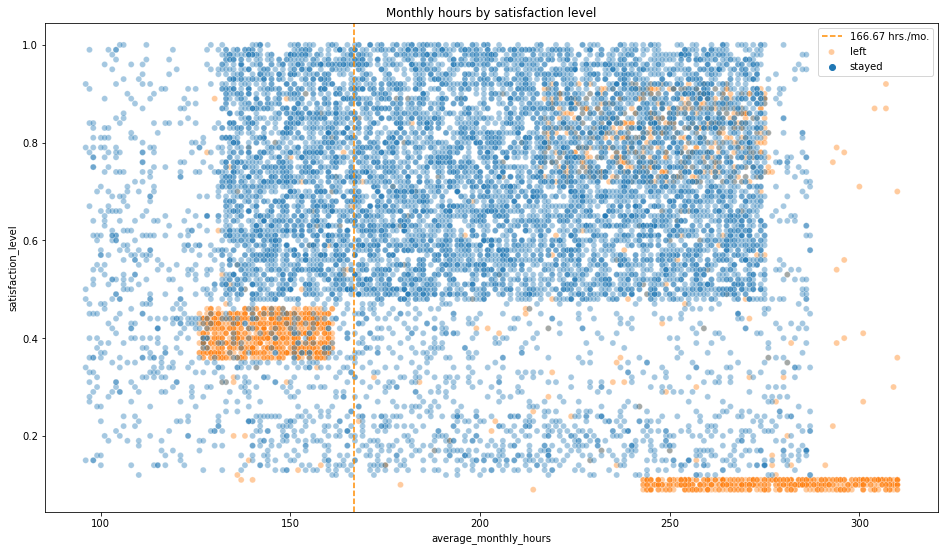

In [16]:
# Create a scatterplot of 'average_monthly_hours' versus 'satisfaction_level', comparing employees who stayed versus those who left. 
plt.figure(figsize= (16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level',hue='left', alpha= 0.4)
plt.axvline(x= 166.67, color='darkorange', label= '166.67 hrs./mo.',ls= '--' )
plt.legend(labels= ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level')

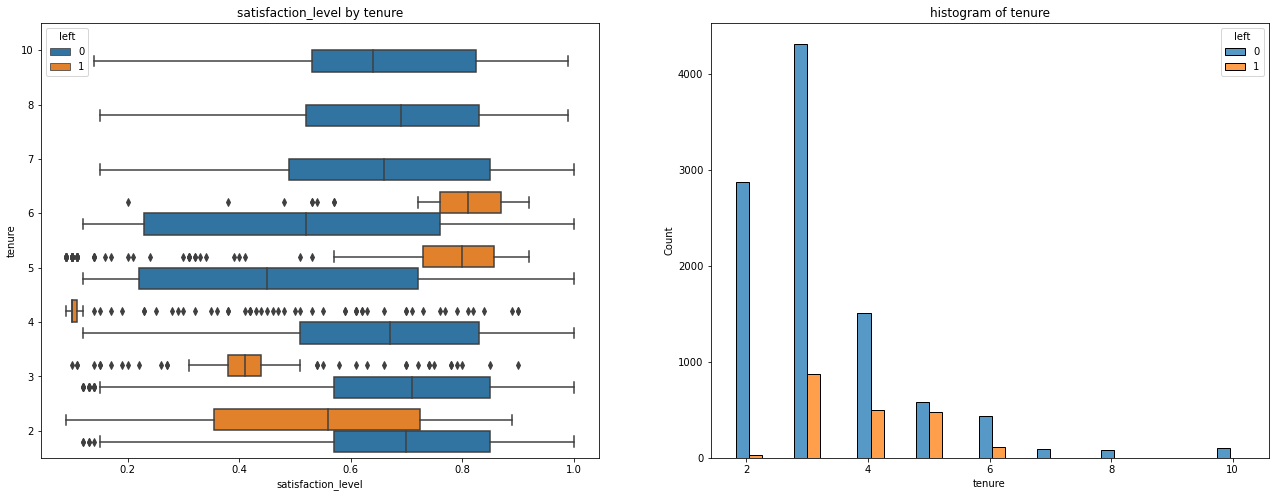

In [17]:
# Create boxplot showing `satisfaction_level` distributions for `tenure`, comparing employees who stayed versus those who left

fig, ax= plt.subplots(1, 2, figsize=(22,8))

sns.boxplot(data= df1, x= 'satisfaction_level', y= 'tenure', hue='left', orient="h", ax=ax[0] )
ax[0].invert_yaxis()
ax[0].set_title('satisfaction_level by tenure')

# create a histogram of 'tenure'
sns.histplot(data= df1, x= 'tenure', hue= 'left', multiple= 'dodge', shrink= 5, ax= ax[1] )
ax[1].set_title('histogram of tenure')

plt.show()

In [18]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.median, np.mean])

,median,mean
left,,
0,0.69,0.667365
1,0.41,0.440271


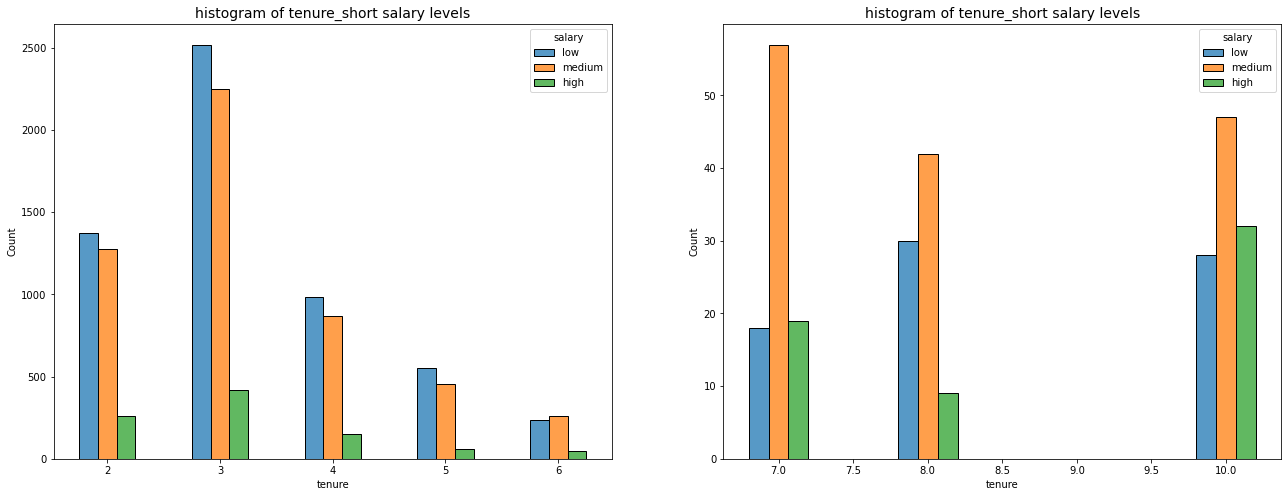

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22,8))

tenure_short = df1[df1['tenure']<=6]
tenure_long = df1[df1['tenure']>6]

# histogram of tenure_short salary levels
sns.histplot(data= tenure_short, x= 'tenure', hue= 'salary',hue_order=['low', 'medium', 'high'],
             discrete=1, shrink= 0.5, multiple= 'dodge', ax= ax[0])
ax[0].set_title('histogram of tenure_short salary levels', fontsize='14')

# histogram of tenure_short salary levels
sns.histplot(data= tenure_long, x= 'tenure', hue= 'salary', hue_order=['low', 'medium', 'high'],
             discrete=1, shrink= 0.4, multiple= 'dodge', ax= ax[1])
ax[1].set_title('histogram of tenure_short salary levels', fontsize='14')

plt.show()

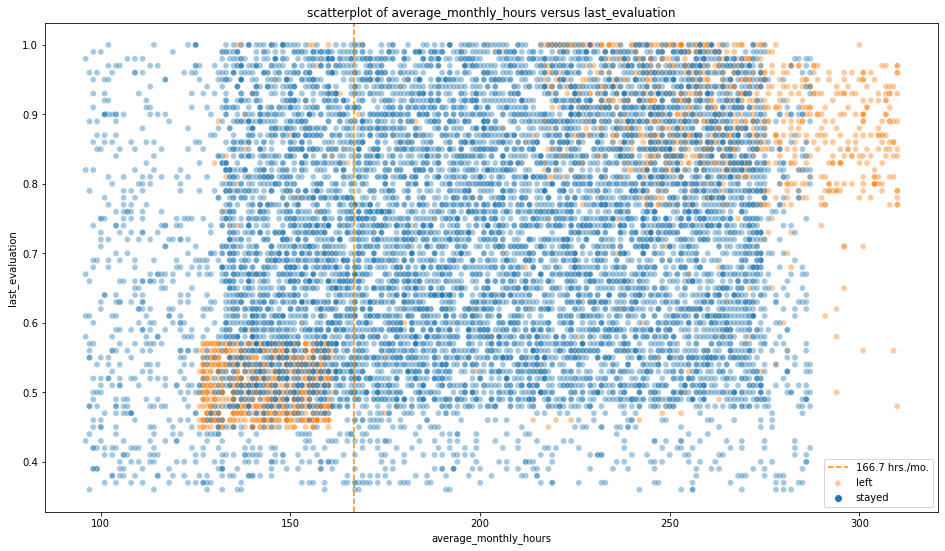

In [20]:
# Create a scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize=(16,9))
sns.scatterplot(data= df1, x= 'average_monthly_hours', y= 'last_evaluation', hue='left', alpha= 0.4)
plt.axvline(x= 166.7, label= '166.7 hrs./mo.', color= 'darkorange', ls='--')
plt.legend(labels=['166.7 hrs./mo.', 'left', 'stayed'])
plt.title('scatterplot of average_monthly_hours versus last_evaluation')
plt.show()

Text(0.5, 1.0, 'Scatter plot of average_monthly_hours versus promotion_last_5years')

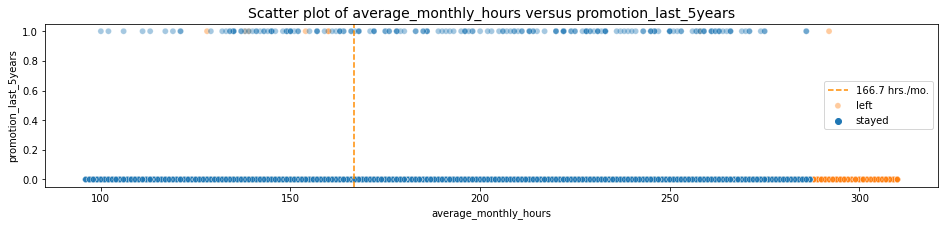

In [21]:
# Create a plot to examine relationship between 'average_monthly_hours' and 'promotion_last_5years'
plt.figure(figsize=(16,3))
sns.scatterplot(data= df1, x= 'average_monthly_hours', y='promotion_last_5years', hue='left', alpha=.4)
plt.axvline(x= 166.7, color='darkorange', label= '166.7 hrs./mo.', ls= '--')
plt.legend(labels=['166.7 hrs./mo.','left','stayed'])
plt.title('Scatter plot of average_monthly_hours versus promotion_last_5years', fontsize='14')

In [22]:
# Inspect how the employees who left are distributed across departments.
# Display counts for each department
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

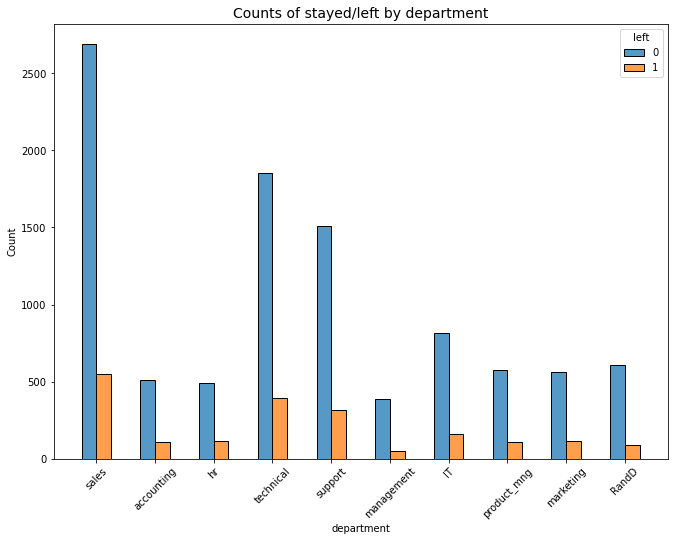

In [23]:
# create a stacked histogram to compare department distribution of employees who left to that of employees who didn't.

plt.figure(figsize=(11,8))

sns.histplot(data= df1, x= 'department', hue= 'left',shrink=0.5, multiple= 'dodge')
plt.xticks(rotation= '45')
plt.title('Counts of stayed/left by department', fontsize=14)
plt.show()

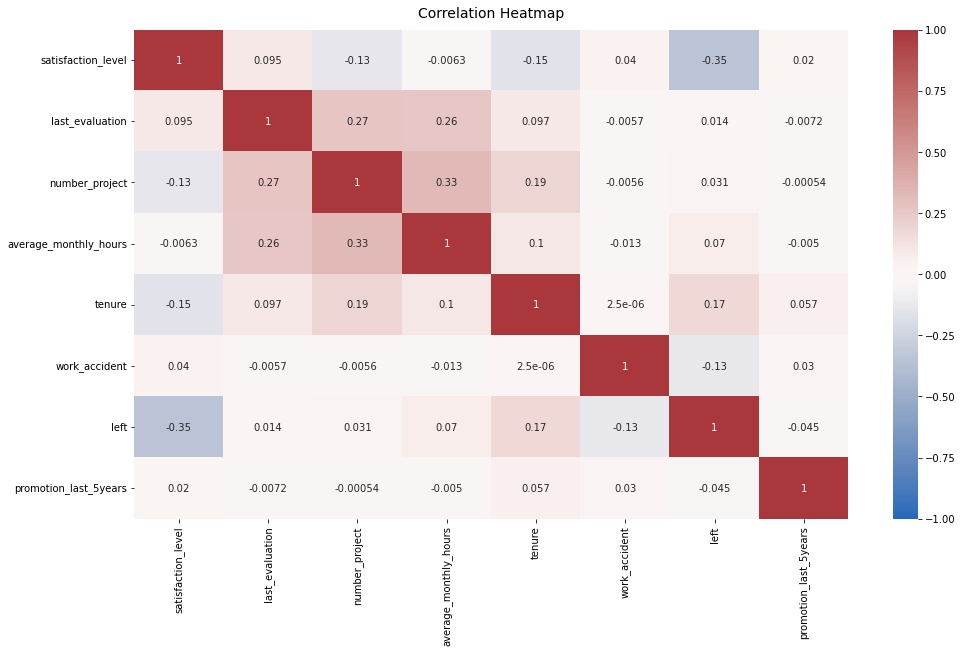

In [24]:
# plot a correalation heatmap

plt.figure(figsize=(16,9))
heatmap= sns.heatmap(df1.corr(), vmin= -1, vmax=1, annot= True, cmap= sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We want to predict whether an employee will leave the company or stay. It is a categorical outcome value. So this task involves binary classification, since the outcome variable left can be either 1(indicating employee left) or 0(indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the value that we want to predict is categorical, we can either use a Logistic Regression model or a Tree_based Machine Learning model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [25]:
# copy the dataframe
df_enc= df1.copy()
# Encode the 'salary' column as an ordinal numeric category.
df_enc['salary']= (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium','high'])
    .cat.codes
)


# Dummy encode the 'department' column:
df_enc= pd.get_dummies(df_enc, drop_first= False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


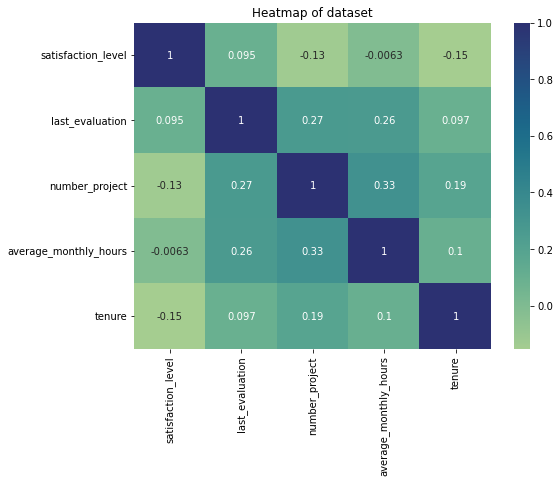

In [26]:
# Create a heatmap to visualize how correlated variables are.
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 
                'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of dataset')
plt.show()

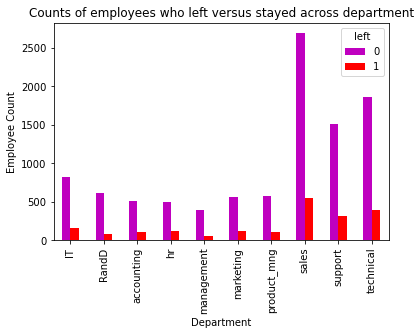

In [27]:
# Create a stacked barplot to visualize number of employees across department, comparing those who left with those who didn't.
pd.crosstab(df1['department'], df1['left']).plot(kind= 'bar', color= 'mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

In [29]:
# Select rows without outliers in 'tenure' and save resulting datafarame in a new variable
df_logreg= df_enc[(df_enc['tenure']>= lower_limit) & (df_enc['tenure']<= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Isolate the outcome variable
y= df_logreg['left']
# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [31]:
# Select the features you want to use in your model
X= df_logreg.drop('left', axis= 1)

# Display the first few rows of selected features
X.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Spliting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 42)

In [33]:
# Construct a logistic regression model and fit it to training dataset
log_clf= LogisticRegression(random_state= 42, max_iter= 500).fit(X_train, y_train)

In [34]:
# Use the Logistic regression model to get preditions on test set.
y_pred= log_clf.predict(X_test)

In [35]:
# Compute values for confusion matrix 
log_cm= confusion_matrix(y_test, y_pred, labels= log_clf.classes_ )

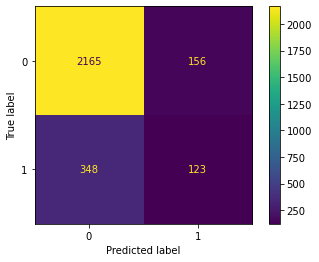

In [36]:
# Create display of confusion matrix
log_disp= ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels= log_clf.classes_ )
# plot confusion matrix
log_disp.plot(values_format='') 
# Display plot
plt.show()

In [37]:
# Create classification report for logistic regression model
target_names= ['predicted would not leave', 'predicted would leave']
print(classification_report(y_test, y_pred, target_names= target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.93      0.90      2321
    predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [38]:
# Modeling Approach B: Tree-based Model
    
# Isolate the outcome variable
y= df_enc['left']
# Display the first few rows of y.
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [39]:
# Select the features
X= df_enc.drop('left', axis=1)
#Display first rows of X.
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# Split the data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 42)

In [41]:
# Instantiate model
tree= DecisionTreeClassifier(random_state= 0)

# Assign a dictionary of hyperparameters to search over
cv_params= {'max_depth':[4, 6, 8, None],
           'min_samples_leaf':[2, 5, 1],
           'min_samples_split':[2, 4, 6]
           }
# Assign a dictionary of scoring metrics to capture
scoring= {'accuracy', 'recall', 'precision', 'f1', 'roc_auc'}
# Instantiate Gridsearch
tree1= GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [42]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.61 s, sys: 349 ms, total: 2.95 s
Wall time: 2.95 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [43]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [44]:
# Check best AUC score on CV
tree1.best_score_

0.9758877392438816

In [45]:
# Write a function that will help you extract all the scores from the grid search.

def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV.

    metric_dict= {'recall':'mean_test_recall',
             'f1':'mean_test_f1',
             'auc':'mean_test_roc_auc',
             'precision':'mean_test_precision',
             'accuracy':'mean_test_accuracy'
                 }
    # Get all the results from the CV and put them in a df.
    
    cv_results= pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score.
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract precision, recall, accuracy, auc and f1 score from that row.
    
    recall= best_estimator_results.mean_test_recall
    f1= best_estimator_results.mean_test_f1
    auc= best_estimator_results.mean_test_roc_auc
    precision= best_estimator_results.mean_test_precision
    accuracy= best_estimator_results.mean_test_accuracy
    
    # Create table of results
    
    table= pd.DataFrame({'model':[model_name],
                        'precision':[precision],
                        'recall':[recall],
                        'accuracy':[accuracy],
                         'F1':[f1],
                        'auc':[auc]
                        })
    return table    

In [46]:
# Get all CV scores
tree1_cv_results= make_results('decision tree cv', tree1, 'auc' )
tree1_cv_results

,model,precision,recall,accuracy,F1,auc
0,decision tree cv,0.966878,0.918288,0.981208,0.941941,0.975888


In [47]:
# Construct a random forest model
# Instantiate the model

rf= RandomForestClassifier(random_state= 0)

# Assign a dictionary of hyperparameters to search over

cv_params= {'max_depth': [2,4,6],
            'max_features': [1.0],
            'max_samples': [0.7,1.0],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2,3,4],
            'n_estimators': [300,500]
           }

# Assign a dictionary of scoring metrics to capture.

scoring= {'recall', 'precision', 'f1', 'accuracy', 'roc_auc'}

# Instantiate Gridsearch

rf1= GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [48]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 7min 3s, sys: 8.81 s, total: 7min 11s
Wall time: 7min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [49]:
# Define a path to the folder where you want to save the model

path= 'E:\FATEMEH\Google Advanced Data Analytics Certificate\final project'

In [50]:
# Define functions to pickle the model and read in the model.

def write_pickle(path, model_object, save_as:str):
    with open(path + save_as +'.pickle','wb') as to_write:
        pickle.dump(model_object, to_write)

In [51]:
def read_pickle (path, saved_model_name):
    with open (path + saved_model_name + '.pickle', 'rb') as to_read:
        model= pickle.load(to_read)
    return model

In [52]:
# write pickle

write_pickle(path, rf1, 'Salifort Motors project')

In [53]:
# Read pickle
rf1= read_pickle(path, 'Salifort Motors project' )

In [54]:
# Check best auc score on CV
rf1.best_score_

0.981992390551151

In [55]:
# Check best params
rf1.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [56]:
# Get all CV scores

rf1_cv_results= make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall  accuracy        F1       auc
0  decision tree cv   0.966878  0.918288  0.981208  0.941941  0.975888
              model  precision    recall  accuracy        F1       auc
0  random forest cv   0.964304  0.919625  0.980985  0.941375  0.981992


In [57]:
# Define a function that gets all the scores from the model's predictions.

def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds= model.best_estimator_.predict(X_test_data)

    auc= roc_auc_score(y_test_data, preds)
    accuracy= accuracy_score(y_test_data, preds)
    precision= precision_score(y_test_data, preds)
    recall= recall_score(y_test_data, preds)
    f1= f1_score(y_test_data, preds)

    table= pd.DataFrame({'model':[model_name],
                    'AUC':[auc],
                    'accuracy':[accuracy],
                    'precision':[precision],
                    'recall':[recall],
                    'f1':[f1]})
    return table

In [58]:
# Get predictions of test data
rf1_test_scores= get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,AUC,accuracy,precision,recall,f1
0,random forest1 test,0.962055,0.98499,0.980892,0.927711,0.95356


In [59]:
# Drop 'satisfaction_level' and save resulting dataframe in new variable
df2= df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
# Create 'over_worked' column. for now, it's identical to 'average_monthly_hours'
df2['overworked']= df2['average_monthly_hours']

# Inspect max and min average_monthly_hours values
print("Max hours:", df2['overworked'].max())
print("Min hours:", df2['overworked'].min())

Max hours: 310
Min hours: 96


In [62]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)
# Display first few rows of new column
df2['overworked'].head()


0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [63]:
# Drop the 'average_monthly_hours' column
df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
# Isolate the outcome variable
y= df2['left']

# Select the features
X= df2.drop('left', axis=1)

In [65]:
# create test data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, stratify=y, random_state=0)

In [66]:
# Instantiate model

tree= DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

cv_params={'max_depth':[4, 6, 8, None],
           'min_samples_leaf':[2, 5, 1],
           'min_samples_split':[2, 4, 6]
           }
# Assign a dictionary of scoring metrics to capture

scoring= {'recall', 'precision', 'f1', 'accuracy', 'roc_auc'}

# Instantiate GridSearch

tree2= GridSearchCV(tree, cv_params, scoring= scoring, cv=4, refit='roc_auc')

In [67]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.75 s, sys: 8.37 ms, total: 2.76 s
Wall time: 2.76 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [69]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [70]:
# Check best AUC score on cv
tree2.best_score_

0.9644467348138378

In [71]:
#Get all cv scores
tree2_cv_results= make_results('decision tree2 cv', tree2,'auc' )
print(tree2_cv_results)
print(tree1_cv_results)

               model  precision    recall  accuracy        F1       auc
0  decision tree2 cv   0.902176  0.904894  0.967752  0.903168  0.964447
              model  precision    recall  accuracy        F1       auc
0  decision tree cv   0.966878  0.918288  0.981208  0.941941  0.975888


In [72]:
# Random Forest round2
# Instantiate the model
rf= RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture

scoring= {'recall', 'precision', 'f1', 'accuracy', 'roc_auc'}

# Instantiate the Gridsearch
          
rf2= GridSearchCV(rf, cv_params, scoring= scoring, cv=4, refit='roc_auc')          

In [73]:
%%time
rf2_cv_results= rf2.fit(X_train, y_train)

CPU times: user 8min 27s, sys: 1.82 s, total: 8min 29s
Wall time: 8min 29s


In [74]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [75]:
# Read in pickle
rf2= read_pickle(path, 'hr_rf2')

In [76]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [77]:
rf2.best_score_

0.9739610103558849

In [78]:
rf2_cv_results= make_results('random forest2 cv',rf2,'auc')
print(rf2_cv_results)
print(rf1_cv_results)

               model  precision    recall  accuracy       F1       auc
0  random forest2 cv   0.906207  0.904892  0.968642  0.90547  0.973961
              model  precision    recall  accuracy        F1       auc
0  random forest cv   0.964304  0.919625  0.980985  0.941375  0.981992


In [79]:
# Get predictions on test data
rf2_test_scores= get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,AUC,accuracy,precision,recall,f1
0,random forest2 test,0.942807,0.968979,0.909091,0.903614,0.906344


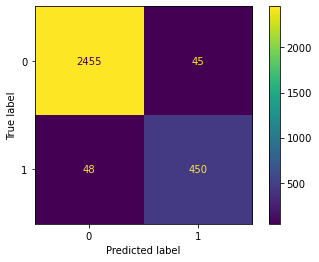

In [80]:
# Generate array of values for confusion matrix
preds= rf2.best_estimator_.predict(X_test)
cm= confusion_matrix(y_test, preds, labels= rf2.classes_)

# Plot confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= rf2.classes_)
disp.plot(values_format='');

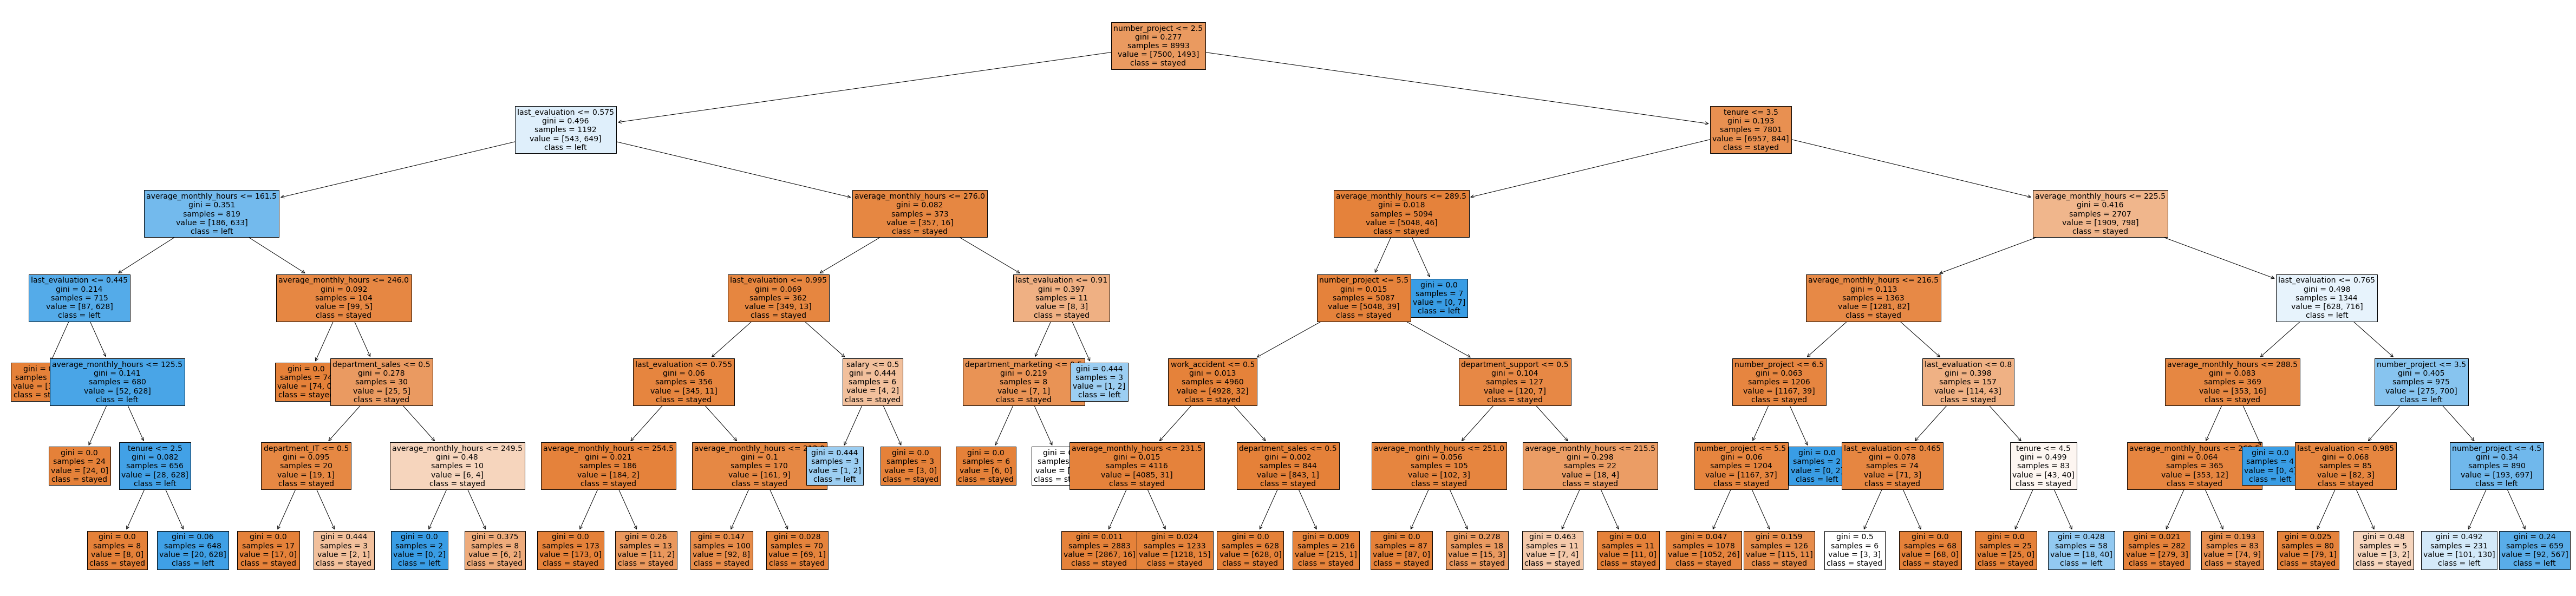

In [81]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled= True);
plt.show()

In [82]:
# Get feature importance from tree

tree2_importances= pd.DataFrame(tree2.best_estimator_.feature_importances_,
                               columns=['gini_importance'], index=X.columns)
tree2_importances= tree2_importances.sort_values(by='gini_importance', ascending= False)

# Only extract features with importance>0

tree2_importances=tree2_importances[(tree2_importances['gini_importance']!= 0)]
tree2_importances

,gini_importance
last_evaluation,0.305009
average_monthly_hours,0.264195
number_project,0.264194
tenure,0.163939
department_sales,0.000840
salary,0.000683
department_support,0.000437
department_marketing,0.000384
department_IT,0.000290
work_accident,0.000029


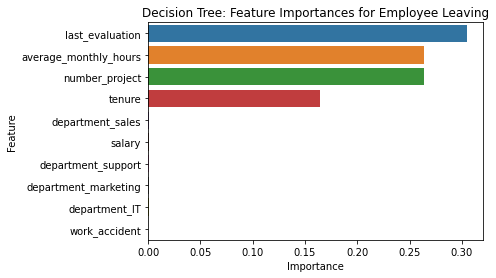

In [83]:
# Create a barplot to visualize the decision tree feature importance

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

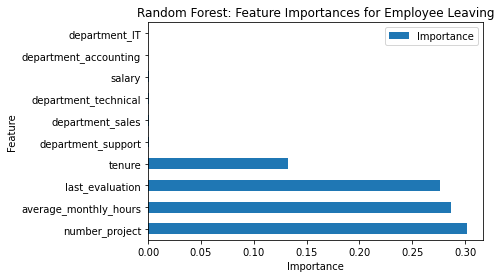

In [84]:
# Random Forest feature importance
# Get feature importances
feat_impt= rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind= np.argpartition(feat_impt, -10)[-10:]

# Get the column labels of top 10 features
feat= X.columns[ind]

#Filter `feat_impt` to consist of top 10 feature importances
feat_impt= feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values(by="Importance", ascending= False)
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

The logistic regression model achieved precision of 86%, recall of 93%, f1-score of 90% (all weighted averages), and accuracy of 82%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 96.4%, precision of 90.2%, recall of 90.4%, f1-score of 90.31%, and accuracy of 96.7%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

Next Steps

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.